# LeNet on Cifar

This is LeNet (6c-16c-120-84) on Cifar10. Adam algorithm (lr=0.001) with 100 epoches.


#### LeNet

    Total params: 44,426
    Trainable params: 44,426
    Non-trainable params: 0


####  LeNet with 10 intrinsic dim

    Total params: 682,076
    Trainable params: 10
    Non-trainable params: 682,066
    
#### LeNet with 15000 intrinsic dim    
    Total params: 930,167,006
    Trainable params: 15,000
    Non-trainable params: 930,152,006

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from decimal import *
%matplotlib inline

In [2]:
""" Extract final stats from resman's diary file"""
def extract_num(lines0, is_reg=False):

    if is_reg:
        valid_loss_str     = lines0[-5]
        valid_accuracy_str = lines0[-6]
        train_loss_str     = lines0[-8]
        train_accuracy_str = lines0[-9]
        average_time_str   = lines0[-10]        
        run_time_str       = lines0[-11]   
        
    else: 
        valid_loss_str     = lines0[-6]
        valid_accuracy_str = lines0[-7]
        train_loss_str     = lines0[-10]
        train_accuracy_str = lines0[-11]
        average_time_str   = lines0[-12]        
        run_time_str       = lines0[-13]


    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

In [3]:
results_dir = '../results/fnn_cifar_l2_reg' 
print results_dir

l2_value = [0.01,0.001,0.0005,0.0001,0.00001,0]
dim = [0,250,500,750,1000,1250,1500,1750,1900,1950,2000,2050,2100,2250,2500,3000,4000,5000,5250,5500,5750,6000,6250,6500,6750,7000,7250,7500,7750,8000,8250,8500,8750,9000,9250,9500,9750,10000,15000,20000,25000,30000,35000,40000,45000,50000]


l2_value_str = []
for i in range(len(l2_value)):
    if i<len(l2_value)-1:   
        if i>2:
            v = format(l2_value[i], '.'+str(i+2)+'f')[:-1] 
        else:
            v = format(l2_value[i], '.'+str(i+2)+'f') 
    else:    
        v = format(l2_value[i], '.'+str(0)+'f') 
    l2_value_str.append(v)
    
print l2_value_str

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)
# print diary_names
          
Rs = []    
diary_names_ordered = []
error_files = []

for j in range(len(l2_value)):
    l2 = l2_value[j]
    for d in dim:
        exist = False
        for f in diary_names:
            if '_'+str(d)+ '_2_200_'+l2_value_str[j]+'/' in f:
                # print "%d is in" % d + f
                exist = True
                diary_names_ordered.append(f)        

                with open(f,'r') as ff:
                    lines0 = ff.readlines()
                    try:
                        R = extract_num(lines0, l2_value_str[j]=='0')
                    except ValueError: 
                        error_files.append((l2,d))
                        R = np.zeros(5)
                        print "Error. Can not read config: reg %.10f and dim %d." % (l2, d) 

                    # print "%d dim:\n"%dim[i] + str(R) + "\n"                

                    Rs.append(R)
        if exist == False:
            print "Missing: l2 " + str(l2) + ", depth:" +str(d)
                                        
Rs = np.array(Rs)

../results/fnn_cifar_l2_reg
['0.01', '0.001', '0.0005', '0.0001', '0.00001', '0']


In [17]:
Rs = Rs.reshape((len(l2_value), len(dim),5))
print Rs.shape

Test_Acc_e4 = Rs[-3,:,1]

print dim
print Test_Acc_e4

print ','.join(['[%i, %s]' % (dim[n], Test_Acc_e4[n]) for n in xrange(len(dim))])


(6, 46, 5)
[0, 250, 500, 750, 1000, 1250, 1500, 1750, 1900, 1950, 2000, 2050, 2100, 2250, 2500, 3000, 4000, 5000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, 9250, 9500, 9750, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
[ 0.5045  0.2299  0.2932  0.3211  0.3519  0.3587  0.3759  0.3851  0.3835
  0.3904  0.3935  0.3993  0.3981  0.3985  0.3984  0.4125  0.4305  0.4399
  0.438   0.4463  0.4452  0.4478  0.4467  0.4528  0.4534  0.4607  0.4586
  0.4537  0.4596  0.46    0.4622  0.4595  0.4662  0.4646  0.4618  0.4688
  0.4687  0.4677  0.486   0.4902  0.4866  0.4906  0.4861  0.4826  0.4847
  0.4883]
[0, 0.5045],[250, 0.2299],[500, 0.2932],[750, 0.3211],[1000, 0.3519],[1250, 0.3587],[1500, 0.3759],[1750, 0.3851],[1900, 0.3835],[1950, 0.3904],[2000, 0.3935],[2050, 0.3993],[2100, 0.3981],[2250, 0.3985],[2500, 0.3984],[3000, 0.4125],[4000, 0.4305],[5000, 0.4399],[5250, 0.438],[5500, 0.4463],[5750, 0.4452],[6000, 0.4478],[6250, 0.44

In [5]:
# 2.2 construct acc_solved_all and dim_solved_all 

acc_solved_all  = np.zeros(len(l2_value))
dim_solved_all = np.ones(len(l2_value))*dim[-1]

for i in range(len(l2_value)):
    l2 = l2_value[i]
    for j in range(len(dim)):
        d = dim[j]
        r = Rs[i,j,1]
        if d==0:
            test_acc_bl = r        
            print "Acc goal is: " + str(test_acc_bl) + " for L2 reg " + str(l2)
        else:
            test_acc = r
            if test_acc>test_acc_bl*0.90:
                acc_solved_all[i]=test_acc
                dim_solved_all[i]=d
                break
                
for i in range(len(l2_value)):  
    l2 = l2_value[i]
    print "Intrinsic dim is: " + str(dim_solved_all[i]) + " for network with L2_reg as " + str(l2)        

Acc goal is: 0.4643 for L2 reg 0.01
Acc goal is: 0.5379 for L2 reg 0.001
Acc goal is: 0.5231 for L2 reg 0.0005
Acc goal is: 0.5045 for L2 reg 0.0001
Acc goal is: 0.5023 for L2 reg 1e-05
Acc goal is: 0.4962 for L2 reg 0
Intrinsic dim is: 50000.0 for network with L2_reg as 0.01
Intrinsic dim is: 25000.0 for network with L2_reg as 0.001
Intrinsic dim is: 15000.0 for network with L2_reg as 0.0005
Intrinsic dim is: 7000.0 for network with L2_reg as 0.0001
Intrinsic dim is: 6750.0 for network with L2_reg as 1e-05
Intrinsic dim is: 5750.0 for network with L2_reg as 0


## Performance comparison with Baseline

"Baseline method" indicates optimization in the parameter space.

The proposed method first embeds parameters into the intrinisic space (via orthogonal matrix), and optimization is the new space.

The dimension of intrinsic space indicates the degree of freedom in the weights of neural nets.

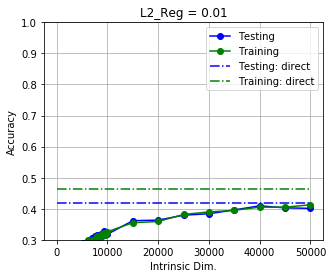

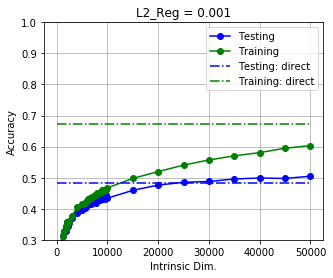

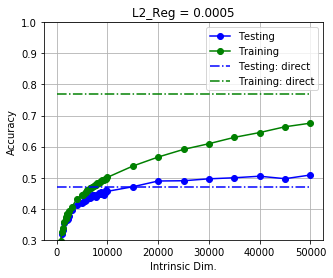

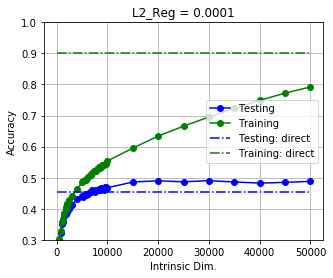

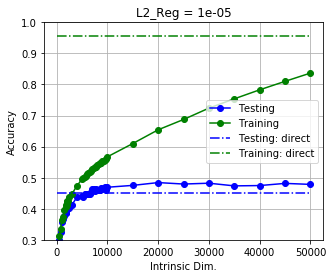

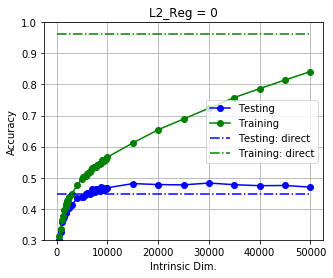

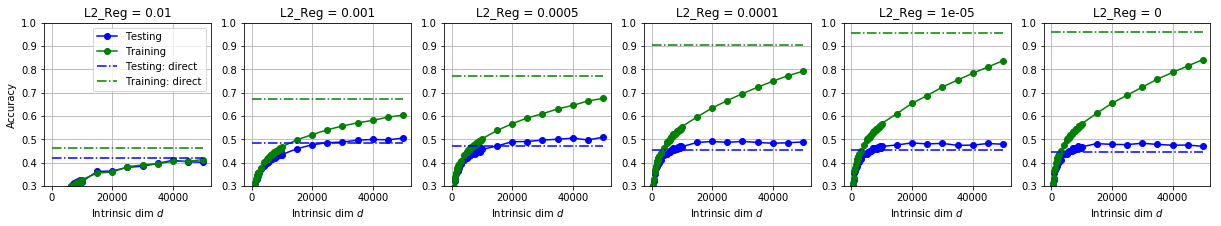

In [6]:
fig_dir = 'figs/fnn_cifar_l2_reg/'
directory = fig_dir
if not os.path.exists(directory):
    os.makedirs(directory)

nn = len(dim)

for i in range(len(l2_value)):
    l2 = l2_value[i]
    fig, ax = subplots(figsize=(5,4) )

    plt.plot(dim[1:], Rs[i,1:,1], 'o-' , color="b",  label="Testing")
    plt.plot(dim[1:], Rs[i,1:,3], 'o-' , color="g",  label="Training")
    ax.plot(dim, Rs[i,0,1]*np.ones(nn)*0.9,'b-.', label="Testing: direct")
    ax.plot(dim, Rs[i,0,3]*np.ones(nn),'g-.', label="Training: direct")

    ax.set_xlabel('Intrinsic Dim.')
    ax.set_ylabel('Accuracy')
    plt.title('L2_Reg = '+str(l2))
    plt.grid()
    ax.legend()
    ax.set_ylim([0.3,1.0])
    # fig.savefig("figs/fnn_cifar_l2_reg/fnn_cifar_l2_reg_acc_"+ str(l2) + ".pdf", bbox_inches='tight')  

# subplot style
fig = plt.figure(figsize=(18,3))
fig.subplots_adjust(left=0.05,right=0.95)

for idx in range(len(l2_value)):
        ax = plt.subplot(1, len(l2_value), idx+1)
        
        l2 = l2_value[idx]
        plt.plot(dim[1:], Rs[idx,1:,1], 'o-' , color="b",  label="Testing")
        plt.plot(dim[1:], Rs[idx,1:,3], 'o-' , color="g",  label="Training")
        ax.plot(dim, Rs[idx,0,1]*np.ones(nn)*0.9,'b-.', label="Testing: direct")
        ax.plot(dim, Rs[idx,0,3]*np.ones(nn),'g-.', label="Training: direct")

        ax.set_xlabel('Intrinsic dim $d$')
        
        plt.title('L2_Reg = '+str(l2))
        plt.grid()
        ax.set_ylim([0.3,1.0]) 
        
#         if idx > 0 and idx < 4:
#             ax.set_ylim([0,3.1])
#         elif idx > 3:
#             ax.set_ylim([0,6.2])
#         elif idx < 1:    
#             ax.set_ylim([1,9.2])
            
        if idx == 0:
            ax.set_ylabel('Accuracy')
            ax.legend()
        
        
fig.savefig("figs/fnn_cifar_l2_reg/fnn_cifar_l2_reg_acc_all.pdf", bbox_inches='tight')          

The above figure show that updating in the intrinsic space can prevent overfitting.


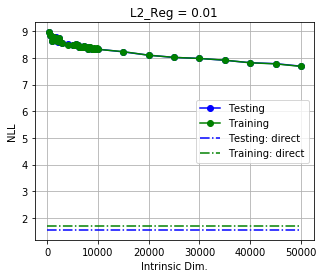

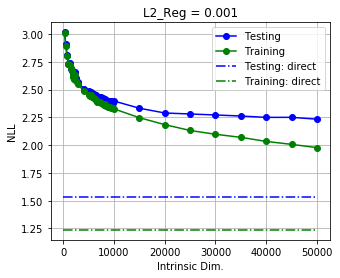

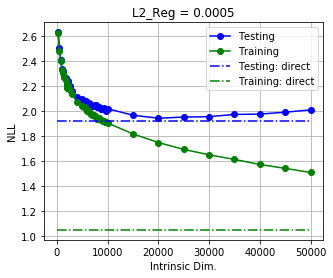

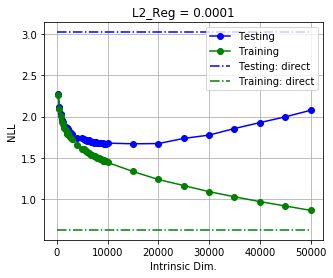

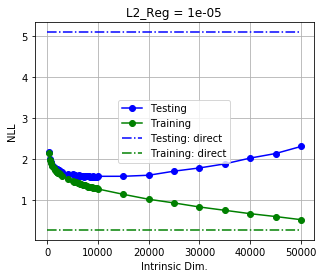

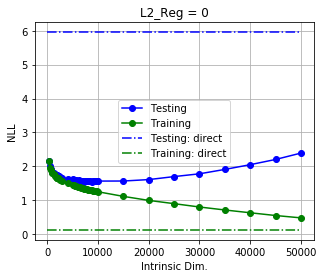

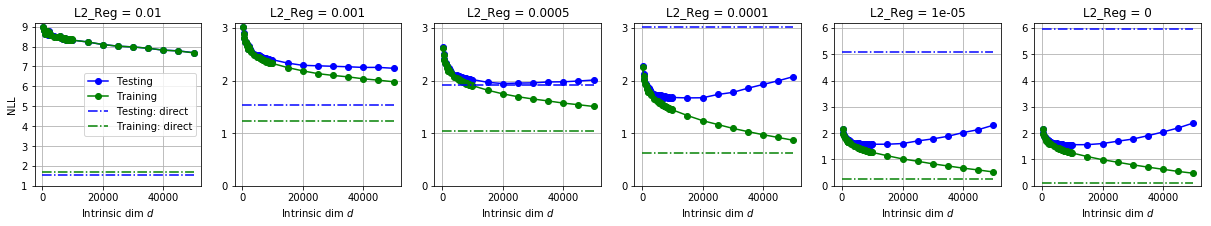

In [7]:
from matplotlib.ticker import MaxNLocator

nn = len(dim)

for i in range(len(l2_value)):
    l2 = l2_value[i]
    fig, ax = subplots(figsize=(5,4))

    plt.plot(dim[1:], Rs[i,1:,0], 'o-' , color="b",  label="Testing")
    plt.plot(dim[1:], Rs[i,1:,2], 'o-' , color="g",  label="Training")
    ax.plot(dim, Rs[i,0,0]*np.ones(nn)*0.9,'b-.', label="Testing: direct")
    ax.plot(dim, Rs[i,0,2]*np.ones(nn),'g-.', label="Training: direct")

    ax.set_xlabel('Intrinsic Dim.')
    ax.set_ylabel('NLL')
    plt.title('L2_Reg = '+str(l2))
    plt.grid()
    ax.legend()
    # ax.set_ylim([0.3,1.0])
    # fig.savefig("figs/fnn_cifar_l2_reg/fnn_cifar_l2_reg_nll_"+ str(l2) + ".pdf", bbox_inches='tight') 
    
    
# subplot style
fig = plt.figure(figsize=(18,3))
fig.subplots_adjust(left=0.05,right=0.95)

for idx in range(len(l2_value)):
        ax = plt.subplot(1, len(l2_value), idx+1)
        
        l2 = l2_value[idx]
        plt.plot(dim[1:], Rs[idx,1:,0], 'o-' , color="b",  label="Testing")
        plt.plot(dim[1:], Rs[idx,1:,2], 'o-' , color="g",  label="Training")
        ax.plot(dim, Rs[idx,0,0]*np.ones(nn)*0.9,'b-.', label="Testing: direct")
        ax.plot(dim, Rs[idx,0,2]*np.ones(nn),'g-.', label="Training: direct")
        
        ax.set_xlabel('Intrinsic dim $d$')
        
        plt.title('L2_Reg = '+str(l2))
        plt.grid()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        
        if idx > 0 and idx < 4:
            ax.set_ylim([0,3.1])
        elif idx > 3:
            ax.set_ylim([0,6.2])
        elif idx < 1:    
            ax.set_ylim([1,9.2])
            
        if idx == 0:
            ax.set_ylabel('NLL')
            ax.legend()
        
fig.savefig("figs/fnn_cifar_l2_reg/fnn_cifar_l2_reg_nll_all.pdf", bbox_inches='tight')        

The above figure show that updating in the intrinsic space can prevent overfitting.

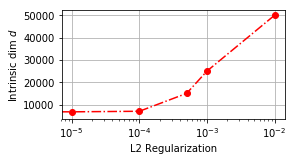

In [8]:
fig, ax = subplots(figsize=(4,2) )

ax.plot(l2_value, dim_solved_all,'ro-.')


ax.set_xlabel('L2 Regularization')
ax.set_ylabel('Intrinsic dim $d$')
ax.set_xscale('log')
# ax.set_xlim([0,0.012])
plt.grid()

fig.savefig("figs/fnn_cifar_l2_reg/fnn_cifar_l2_reg_intrinsic_dim.pdf", bbox_inches='tight')    